In [41]:

from google.colab import drive
drive.mount('/content/drive')

# train.csvとtest.csvが格納されているディレクトリを指定
target_directory = '/content/drive/MyDrive/kaggle/titanic'

# 作業ディレクトリを変更
os.chdir(target_directory)

for dirname, _, filenames in os.walk(target_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/kaggle/titanic/gender_submission.csv
/content/drive/MyDrive/kaggle/titanic/train.csv
/content/drive/MyDrive/kaggle/titanic/test.csv
/content/drive/MyDrive/kaggle/titanic/titanic_code.ipynb
/content/drive/MyDrive/kaggle/titanic/submission.csv
/content/drive/MyDrive/kaggle/titanic/README.md
/content/drive/MyDrive/kaggle/titanic/.gitignore
/content/drive/MyDrive/kaggle/titanic/.git/description
/content/drive/MyDrive/kaggle/titanic/.git/COMMIT_EDITMSG
/content/drive/MyDrive/kaggle/titanic/.git/index
/content/drive/MyDrive/kaggle/titanic/.git/HEAD
/content/drive/MyDrive/kaggle/titanic/.git/config
/content/drive/MyDrive/kaggle/titanic/.git/objects/bb/e396eda85b64872c67198b3ab3883cd69a7b4e
/content/drive/MyDrive/kaggle/titanic/.git/objects/8c/8009d037474f109611fa4a5a2896301993ef45
/content/drive/MyDrive/kaggle/titanic/.git/objects/fb/65c3f1b74

In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [123]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
# survival (生存):
# 0 = 死亡
# 1 = 生存

# pclass (チケットクラス):
# 1 = 1等席
# 2 = 2等席
# 3 = 3等席

# sex (性別):
# 乗客の性別。

# Age (年齢):
# 乗客の年齢（年単位）。

# sibsp (同乗している兄弟姉妹/配偶者の数):
# タイタニック号に乗船している兄弟姉妹または配偶者の人数。
# 兄弟姉妹には、兄、弟、姉、妹、義兄弟、義姉妹が含まれます。
# 配偶者には、夫、妻が含まれます（愛人や婚約者は考慮されていません）。

# parch (同乗している親/子供の数):
# タイタニック号に乗船している親または子供の人数。
# 親には、母、父が含まれます。
# 子供には、娘、息子、義理の娘、義理の息子が含まれます。
# 一部の子供は乳母のみと旅行したため、その場合のparchは0です。

# ticket (チケット番号):
# 乗客のチケット番号。

# fare (運賃):
# 乗客が支払った運賃。

# cabin (客室番号):
# 乗客の客室番号。

# embarked (乗船港):
# 乗客が乗船した港。
# C = シェルブール (Cherbourg)
# Q = クイーンズタウン (Queenstown)
# S = サウサンプトン (Southampton)

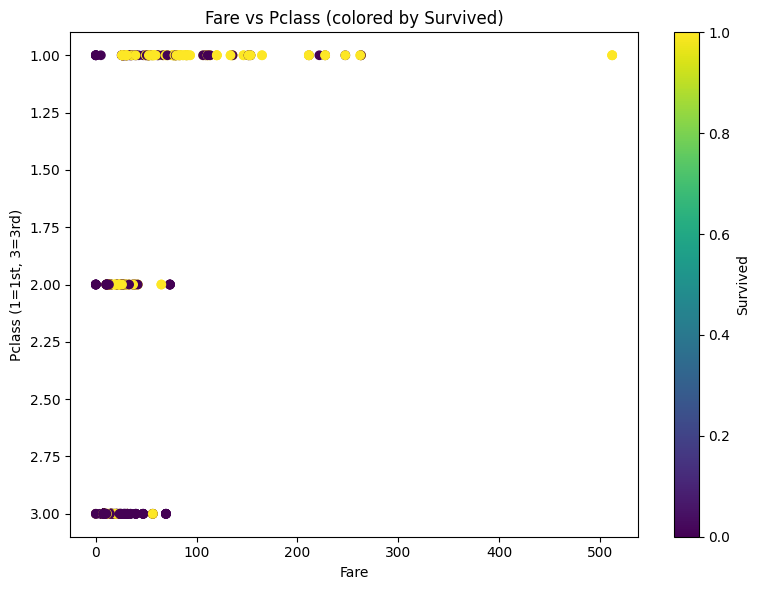

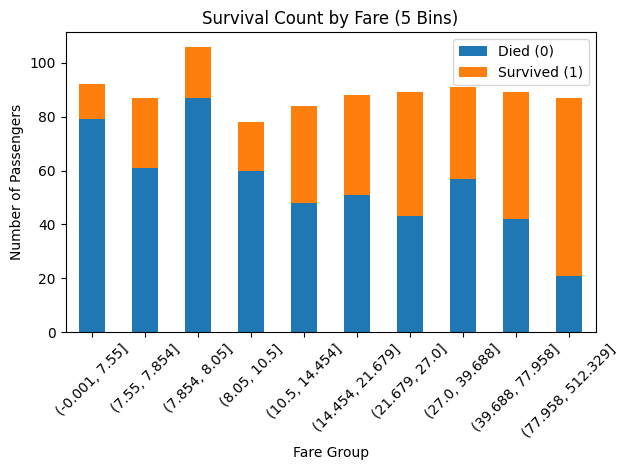

In [126]:
#運賃と生存の関係

plt.figure(figsize=(8,6))
plt.scatter(df_train['Fare'], df_train['Pclass'], c=df_train['Survived'])
plt.xlabel("Fare")
plt.ylabel("Pclass (1=1st, 3=3rd)")
plt.title("Fare vs Pclass (colored by Survived)")
plt.gca().invert_yaxis()  # 1等を上に
plt.colorbar(label="Survived")
plt.tight_layout()
plt.show()

df_train['Fare_bin'] = pd.qcut(df_train['Fare'], 10)
fare_survival = df_train.groupby(['Fare_bin','Survived']).size().unstack()

fare_survival.plot(kind='bar', stacked=True)
plt.title("Survival Count by Fare (5 Bins)")
plt.xlabel("Fare Group")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#運賃が高い奴生存率高め


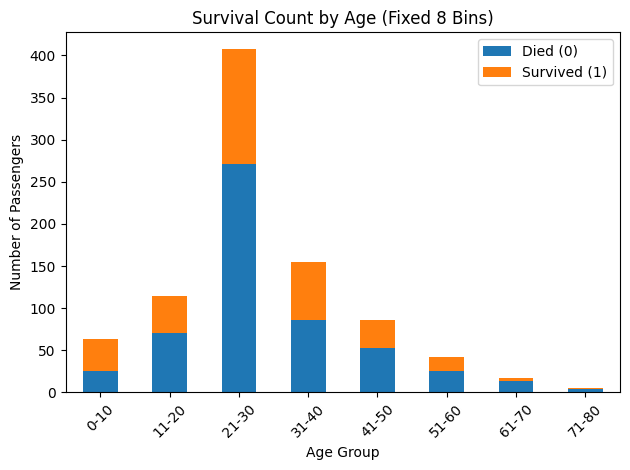

In [127]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40',
          '41-50', '51-60', '61-70', '71-80']

df_train['Age_bin'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=True)

# ② Age_bin × Survived で人数を集計
age_survival = df_train.groupby(['Age_bin', 'Survived']).size().unstack()

# ③ 積み上げ棒グラフで可視化
age_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Age (Fixed 8 Bins)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#未成年の生存率高め

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


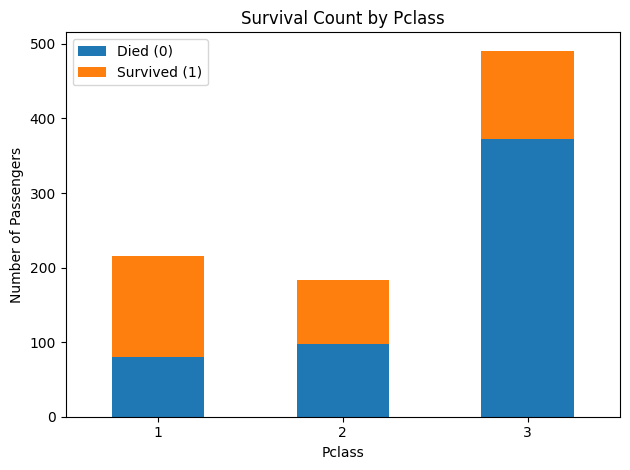

In [128]:
display(df_train.groupby('Pclass')['Survived'].mean())
sex_survival = df_train.groupby(['Pclass', 'Survived']).size().unstack()
sex_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

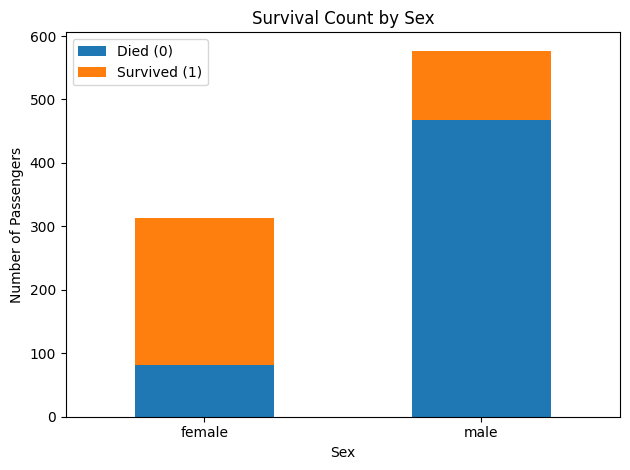

In [129]:
df_train.groupby('Sex')['Survived'].mean()
sex_survival = df_train.groupby(['Sex', 'Survived']).size().unstack()
sex_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#女生存率高め



0    24.0
Name: Age, dtype: float64


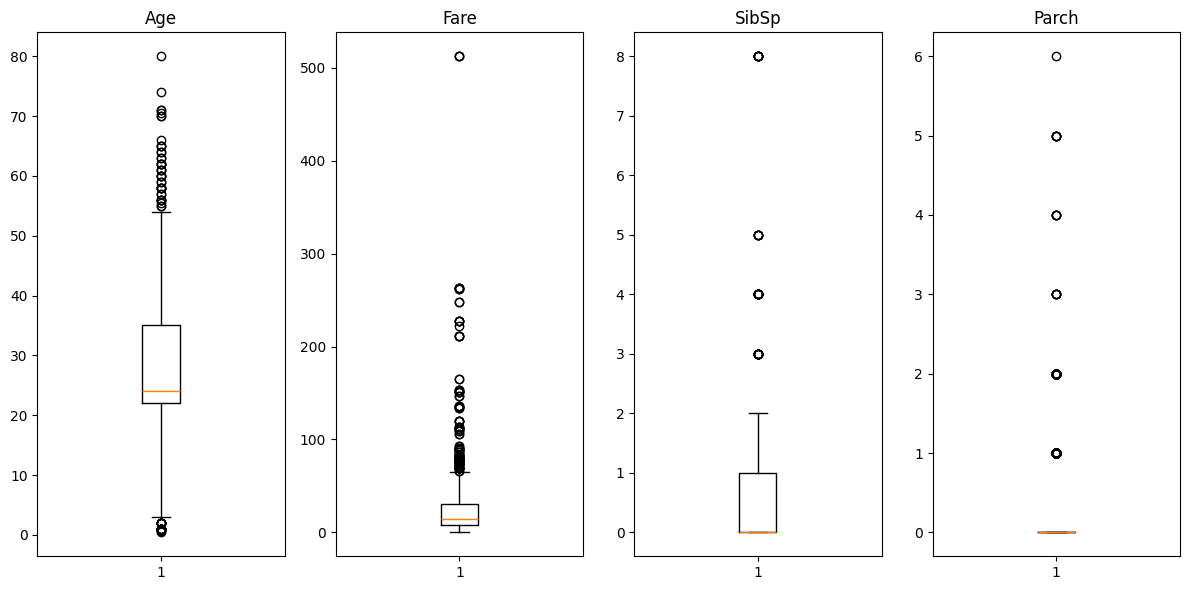

In [130]:
# display(df_train.isnull().sum())
# display(df_test.isnull().sum())
# Ageとcabinに欠損値を確認


# display(df_train[df_train['Age'].isna()])
# Ageを最頻値で補完
print(df_train['Age'].mode())
df_train['Age'].fillna(df_train['Age'].mode()[0], inplace=True)
df_test['Age'].fillna(df_train['Age'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_train['Fare'].mode()[0], inplace=True)


#外れ値の確認

cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    plt.boxplot(df_train[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()



In [131]:
from IPython.lib.security import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# display(df_train.head())


train_survived = df_train["Survived"]

features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
train_feature = pd.get_dummies(df_train[features])
test_feature = pd.get_dummies(df_test[features])

#欠損値確認➔testのFareにNan発見
# display(df_train[features].isnull().sum())
# display(df_test[features].isnull().sum())

# model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=1)
# model.fit(X,y)
# predictions = model.predict(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(train_feature, train_survived)
predictions = model.predict(test_feature)


output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_ver3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
